In [1]:
import xarray as xr
import glob
import os
import numpy as np
import pandas as pd
from dask.diagnostics import ProgressBar
import time
from dask import delayed
from dask import delayed, persist
import dask
import dask.array as da
import xarray as xr
from dask import delayed
from dask.diagnostics import ProgressBar
import re
os.environ['ESMFMKFILE'] = '/glade/work/wchapman/miniconda3.1//envs/MLWPS/lib/esmf.mk'
import xesmf as xe

In [10]:
ds_out = xr.open_dataset('/glade/u/home/wchapman/MLWPS/Stage_Data/ML_grid.nc')
ds_out

<xarray.Dataset>
Dimensions:    (latitude: 640, longitude: 1280)
Coordinates:
  * latitude   (latitude) float64 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * longitude  (longitude) float64 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
Data variables:
    *empty*

In [3]:
#### settings !!! MODIFY THIS BLOCK
start_date = '2010-01-01'
end_date = '2011-01-02' #make sure this date is after the start date... 
interval_hours = 1 #what hour interval would you like to get? [i.e: 1 = 24 files/day, 6 = 4 files/day]
FPout = '/glade/derecho/scratch/wchapman/STAGING/' #where do you want the files stored?
prefix_out = 'ERA5_e5.oper.ml.v3.uvtq.' #what prefix do you want the files stored with?
project_num = 'NAML0001'
print('try this')
#### settings !!! MODIFY THIS BLOCK

if 'client' in locals():
    client.shutdown()
    print('...shutdown client...')
else:
    print('client does not exist yet')

###dask NCAR client: 
from distributed import Client
from dask_jobqueue import PBSCluster

cluster = PBSCluster(project='NAML0001',walltime='02:00:00',cores=1, memory='20GB',shared_temp_directory='/glade/scratch/wchapman/tmp',queue='casper')
cluster.scale(jobs=40)
client = Client(cluster)
#client

try this
client does not exist yet


/glade/work/wchapman/miniconda3.1/envs/MLWPS/lib/python3.11/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/work/wchapman/miniconda3.1/envs/MLWPS/lib/python3.11/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)


In [15]:
arrie = ['/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010100_2012010123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010200_2012010223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010300_2012010323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010400_2012010423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010500_2012010523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010600_2012010623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010700_2012010723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010800_2012010823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012010900_2012010923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011000_2012011023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011100_2012011123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011200_2012011223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011300_2012011323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011400_2012011423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011500_2012011523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011600_2012011623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011700_2012011723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011800_2012011823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012011900_2012011923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012000_2012012023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012100_2012012123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012200_2012012223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012300_2012012323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012400_2012012423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012500_2012012523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012600_2012012623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012700_2012012723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012800_2012012823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012012900_2012012923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012013000_2012013023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201201/e5.oper.an.pl.128_129_z.ll025sc.2012013100_2012013123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020100_2012020123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020200_2012020223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020300_2012020323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020400_2012020423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020500_2012020523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020600_2012020623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020700_2012020723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020800_2012020823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012020900_2012020923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021000_2012021023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021100_2012021123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021200_2012021223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021300_2012021323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021400_2012021423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021500_2012021523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021600_2012021623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021700_2012021723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021800_2012021823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012021900_2012021923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022000_2012022023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022100_2012022123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022200_2012022223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022300_2012022323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022400_2012022423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022500_2012022523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022600_2012022623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022700_2012022723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022800_2012022823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201202/e5.oper.an.pl.128_129_z.ll025sc.2012022900_2012022923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030100_2012030123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030200_2012030223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030300_2012030323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030400_2012030423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030500_2012030523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030600_2012030623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030700_2012030723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030800_2012030823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012030900_2012030923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031000_2012031023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031100_2012031123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031200_2012031223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031300_2012031323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031400_2012031423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031500_2012031523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031600_2012031623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031700_2012031723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031800_2012031823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012031900_2012031923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032000_2012032023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032100_2012032123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032200_2012032223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032300_2012032323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032400_2012032423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032500_2012032523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032600_2012032623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032700_2012032723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032800_2012032823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012032900_2012032923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012033000_2012033023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201203/e5.oper.an.pl.128_129_z.ll025sc.2012033100_2012033123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040100_2012040123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040200_2012040223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040300_2012040323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040400_2012040423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040500_2012040523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040600_2012040623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040700_2012040723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040800_2012040823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012040900_2012040923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041000_2012041023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041100_2012041123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041200_2012041223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041300_2012041323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041400_2012041423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041500_2012041523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041600_2012041623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041700_2012041723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041800_2012041823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012041900_2012041923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042000_2012042023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042100_2012042123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042200_2012042223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042300_2012042323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042400_2012042423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042500_2012042523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042600_2012042623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042700_2012042723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042800_2012042823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012042900_2012042923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201204/e5.oper.an.pl.128_129_z.ll025sc.2012043000_2012043023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050100_2012050123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050200_2012050223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050300_2012050323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050400_2012050423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050500_2012050523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050600_2012050623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050700_2012050723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050800_2012050823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012050900_2012050923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051000_2012051023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051100_2012051123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051200_2012051223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051300_2012051323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051400_2012051423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051500_2012051523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051600_2012051623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051700_2012051723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051800_2012051823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012051900_2012051923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052000_2012052023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052100_2012052123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052200_2012052223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052300_2012052323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052400_2012052423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052500_2012052523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052600_2012052623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052700_2012052723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052800_2012052823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012052900_2012052923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012053000_2012053023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201205/e5.oper.an.pl.128_129_z.ll025sc.2012053100_2012053123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060100_2012060123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060200_2012060223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060300_2012060323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060400_2012060423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060500_2012060523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060600_2012060623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060700_2012060723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060800_2012060823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012060900_2012060923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061000_2012061023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061100_2012061123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061200_2012061223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061300_2012061323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061400_2012061423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061500_2012061523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061600_2012061623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061700_2012061723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061800_2012061823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012061900_2012061923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062000_2012062023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062100_2012062123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062200_2012062223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062300_2012062323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062400_2012062423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062500_2012062523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062600_2012062623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062700_2012062723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062800_2012062823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012062900_2012062923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201206/e5.oper.an.pl.128_129_z.ll025sc.2012063000_2012063023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070100_2012070123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070200_2012070223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070300_2012070323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070400_2012070423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070500_2012070523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070600_2012070623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070700_2012070723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070800_2012070823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012070900_2012070923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071000_2012071023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071100_2012071123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071200_2012071223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071300_2012071323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071400_2012071423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071500_2012071523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071600_2012071623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071700_2012071723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071800_2012071823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012071900_2012071923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072000_2012072023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072100_2012072123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072200_2012072223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072300_2012072323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072400_2012072423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072500_2012072523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072600_2012072623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072700_2012072723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072800_2012072823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012072900_2012072923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012073000_2012073023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201207/e5.oper.an.pl.128_129_z.ll025sc.2012073100_2012073123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080100_2012080123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080200_2012080223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080300_2012080323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080400_2012080423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080500_2012080523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080600_2012080623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080700_2012080723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080800_2012080823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012080900_2012080923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081000_2012081023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081100_2012081123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081200_2012081223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081300_2012081323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081400_2012081423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081500_2012081523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081600_2012081623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081700_2012081723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081800_2012081823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012081900_2012081923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082000_2012082023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082100_2012082123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082200_2012082223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082300_2012082323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082400_2012082423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082500_2012082523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082600_2012082623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082700_2012082723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082800_2012082823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012082900_2012082923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012083000_2012083023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201208/e5.oper.an.pl.128_129_z.ll025sc.2012083100_2012083123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090100_2012090123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090200_2012090223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090300_2012090323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090400_2012090423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090500_2012090523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090600_2012090623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090700_2012090723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090800_2012090823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012090900_2012090923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091000_2012091023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091100_2012091123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091200_2012091223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091300_2012091323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091400_2012091423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091500_2012091523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091600_2012091623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091700_2012091723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091800_2012091823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012091900_2012091923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092000_2012092023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092100_2012092123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092200_2012092223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092300_2012092323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092400_2012092423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092500_2012092523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092600_2012092623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092700_2012092723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092800_2012092823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012092900_2012092923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201209/e5.oper.an.pl.128_129_z.ll025sc.2012093000_2012093023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100100_2012100123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100200_2012100223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100300_2012100323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100400_2012100423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100500_2012100523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100600_2012100623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100700_2012100723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100800_2012100823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012100900_2012100923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101000_2012101023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101100_2012101123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101200_2012101223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101300_2012101323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101400_2012101423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101500_2012101523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101600_2012101623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101700_2012101723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101800_2012101823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012101900_2012101923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102000_2012102023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102100_2012102123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102200_2012102223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102300_2012102323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102400_2012102423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102500_2012102523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102600_2012102623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102700_2012102723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102800_2012102823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012102900_2012102923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012103000_2012103023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201210/e5.oper.an.pl.128_129_z.ll025sc.2012103100_2012103123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110100_2012110123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110200_2012110223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110300_2012110323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110400_2012110423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110500_2012110523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110600_2012110623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110700_2012110723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110800_2012110823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012110900_2012110923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111000_2012111023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111100_2012111123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111200_2012111223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111300_2012111323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111400_2012111423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111500_2012111523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111600_2012111623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111700_2012111723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111800_2012111823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012111900_2012111923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112000_2012112023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112100_2012112123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112200_2012112223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112300_2012112323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112400_2012112423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112500_2012112523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112600_2012112623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112700_2012112723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112800_2012112823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012112900_2012112923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201211/e5.oper.an.pl.128_129_z.ll025sc.2012113000_2012113023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120100_2012120123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120200_2012120223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120300_2012120323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120400_2012120423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120500_2012120523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120600_2012120623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120700_2012120723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120800_2012120823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012120900_2012120923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121000_2012121023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121100_2012121123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121200_2012121223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121300_2012121323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121400_2012121423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121500_2012121523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121600_2012121623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121700_2012121723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121800_2012121823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012121900_2012121923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122000_2012122023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122100_2012122123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122200_2012122223.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122300_2012122323.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122400_2012122423.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122500_2012122523.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122600_2012122623.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122700_2012122723.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122800_2012122823.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012122900_2012122923.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012123000_2012123023.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201212/e5.oper.an.pl.128_129_z.ll025sc.2012123100_2012123123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201301/e5.oper.an.pl.128_129_z.ll025sc.2013010100_2013010123.nc',
       '/glade/campaign/collections/rda/data/ds633.0/e5.oper.an.pl/201301/e5.oper.an.pl.128_129_z.ll025sc.2013010200_2013010223.nc']

In [16]:
NU_ds = xr.open_mfdataset(arrie,parallel=True)
NU_ds.sel(level=500)

<xarray.Dataset>
Dimensions:    (time: 8832, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    level      float64 500.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 2012-01-01 ... 2013-01-02T23:00:00
Data variables:
    Z          (time, latitude, longitude) float32 dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    utc_date   (time) int32 dask.array<chunksize=(24,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.3
    CONVERSION_PLATFORM:  Linux r5i1n11 4.12.14-94.41-default #1 SMP Wed Oct ...
    CONVERSION_DATE:      Sun Aug 25 15:17:15 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Sun Aug 25 15:17:33 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [7]:
NU_ds = xr.open_mfdataset(arrie,parallel=True)
DSe = xr.open_dataset('/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.20120103.nc')
newlat = DSe['latitude']
newlon = DSe['longitude']
ds_out = xr.Dataset({'latitude': newlat, 'longitude': newlon})
print('... begining to regrid please...!')
#fn = '/glade/work/wchapman/DA_ML/data_handling/bilinear_192x288_191x288.nc'
# regridder = xe.Regridder(NU_ds, ds_out, 'bilinear',weights=fn)
regridder = xe.Regridder(NU_ds, ds_out, 'bilinear')

... begining to regrid please...!


AttributeError: module 'esmpy' has no attribute 'api'

In [9]:
if 'client' in locals():
    client.shutdown()
    print('...shutdown client...')
else:
    print('client does not exist yet')

/glade/work/wchapman/miniconda3.1/envs/MLWPS/lib/python3.11/site-packages/dask_jobqueue/pbs.py:82: FutureWarning: project has been renamed to account as this kwarg was used wit -A option. You are still using it (please also check config files). If you did not set account yet, project will be respected for now, but it will be removed in a future release. If you already set account, project is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)


...shutdown client...


In [2]:
DSopen= xr.open_dataset('/glade/work/wchapman/regrid_this_bad_boyv2.nc')

In [9]:
DSe = xr.open_dataset('/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.20120103.nc')
newlat = DSe['latitude']
newlon = DSe['longitude']
ds_out = xr.Dataset({'latitude': newlat, 'longitude': newlon})
ds_out.to_netcdf('./ML_grid.nc')

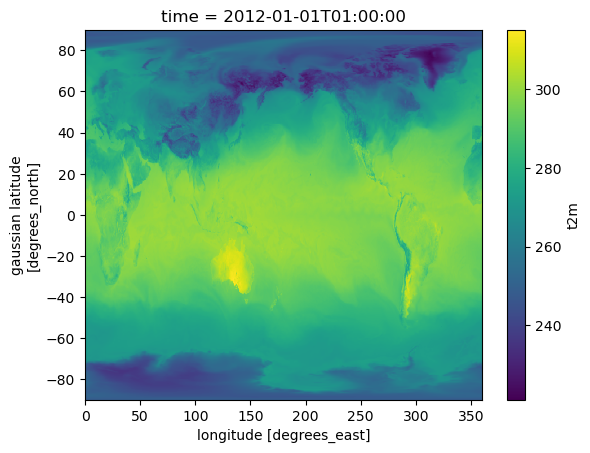

In [6]:
DSopen['t2m'].isel(time=0).plot()

In [ ]:
def regrid(file_list,method='bilinear'):
    DSog = xr.open_mfdataset(file_list,parallel=True)
    
    ds_out = xr.Dataset(
        {
            "latitude": (["latitude"], np.arange(16, 75, 1.0)),
            "longitude": (["longitude"], np.arange(200, 330, 1.5)),
        }
    )
    
    regridder = xe.Regridder(ds, ds_out, "bilinear")
    regridder


In [29]:

def find_staged_files(start_date,end_date):
    date_range_daily=pd.date_range(start_date,end_date)
    files_=[]
    for dtdt in date_range_daily:
        d_file = FPout+prefix_out+str(dtdt)[:10].replace('-','')+'.nc'
        files_.append(d_file)

        if not os.path.exists(d_file):
            print('this file doesnt exist: ', d_file) 
            
    return files_
files_ = find_staged_files(start_date,end_date)

In [33]:
DS = xr.open_mfdataset(files_,parallel=True)
print('opened')
DS = DS.chunk({'time':10})
print('chunked')

In [35]:
DS.to_zarr(FPout+'All_2010_staged.zarr')

/glade/work/wchapman/miniconda3.1/envs/MLWPS/lib/python3.11/site-packages/distributed/client.py:3125: UserWarning: Sending large graph of size 75.13 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


In [5]:
lister = ['/glade/derecho/scratch/wchapman/STAGING//ERA5_e5.oper.ml.v3.uvtq.20100101.nc', '/glade/derecho/scratch/wchapman/STAGING//ERA5_e5.oper.ml.v3.uvtq.20100102.nc', '/glade/derecho/scratch/wchapman/STAGING//ERA5_e5.oper.ml.v3.uvtq.20100103.nc']


xr.open_mfdataset(lister,parallel=True)



<xarray.Dataset>
Dimensions:     (time: 72, level: 15, latitude: 640, longitude: 1280,
                 half_level: 138)
Coordinates:
  * half_level  (half_level) int32 1 2 3 4 5 6 7 ... 132 133 134 135 136 137 138
  * latitude    (latitude) float64 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * level       (level) int32 10 30 40 50 60 70 80 90 95 100 105 110 120 130 136
  * longitude   (longitude) float64 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
  * time        (time) datetime64[ns] 2010-01-01 ... 2010-01-03T23:00:00
Data variables:
    U           (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 15, 640, 1280), meta=np.ndarray>
    V           (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 15, 640, 1280), meta=np.ndarray>
    T           (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 15, 640, 1280), meta=np.ndarray>
    Q           (time, level, latitude, longitude) float32 dask.array<chunksize=(24, 15, 640, 1280), meta=np.ndarray>
    SP          (time, latitude, longitude) float32 dask.array<chunksize=(24, 640, 1280), meta=np.ndarray>
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    cheyenne node employed: Linux r2i...
    CONVERSION_AND_COMPRSSION_DATE:         Sat Dec 24 17:14:38 MST 2022
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Sat Dec 24 17:14:51 2022: ncks -4...
    NCO:                                    netCDF Operators version 5.0.3 (H...

In [31]:
DS = xr.open_dataset('/glade/derecho/scratch/wchapman/ERA5_regrid_out/ERA5_e5.oper.ml.v3.uvtq.2014021518.nc').sel(level=[10,30,40,50,60,70,80,90,95,100,105,110,120,130,136]).drop(['weight','utc_date','a_half','zero','a_model','b_model','b_half'])
DS2 = xr.open_dataset('/glade/derecho/scratch/wchapman/ERA5_regrid_out/ERA5_e5.oper.ml.v3.ps.2014021518.nc').drop(['weight','utc_date','zero'])
DS = xr.merge([DS,DS2])

In [35]:
DS['time'].shape

()

In [25]:
DD = np.array(DS.drop(['Z_GDS4_SFC','US','VS']))

<xarray.Dataset>
Dimensions:     (level: 15, latitude: 640, longitude: 1280, half_level: 138)
Coordinates:
  * half_level  (half_level) int32 1 2 3 4 5 6 7 ... 132 133 134 135 136 137 138
  * latitude    (latitude) float64 89.78 89.51 89.23 ... -89.23 -89.51 -89.78
  * level       (level) int32 10 30 40 50 60 70 80 90 95 100 105 110 120 130 136
  * longitude   (longitude) float64 0.0 0.2812 0.5625 ... 359.2 359.4 359.7
    time        datetime64[ns] 2014-02-15T18:00:00
Data variables:
    U           (level, latitude, longitude) float32 ...
    V           (level, latitude, longitude) float32 ...
    T           (level, latitude, longitude) float32 ...
    Q           (level, latitude, longitude) float32 ...
    SP          (latitude, longitude) float32 ...
Attributes: (12/18)
    RDA_DATASET:                            ds633.6
    RDA_DATASET_URL:                        https:/rda.ucar.edu/datasets/ds63...
    RDA_DATASET_DOI:                        DOI: 10.5065/XV5R-5344
    RDA_DATASET_GROUP:                      ERA5 atmospheric model level anal...
    DATA_SOURCE:                            Downloaded by NCAR/CISL/DECS from...
    DOWNLOAD_SPECIALIST:                    Chi-Fan Shih, NCAR/CISL/DECS, chi...
    ...                                     ...
    NETCDF_COMPRESSION:                     Precision-preserving compression ...
    CONVERSION_AND_COMPRESSION_PLATFORM:    cheyenne node employed: Linux r11...
    CONVERSION_AND_COMPRSSION_DATE:         Mon Jan  2 17:43:15 MST 2023
    CONVERSION_AND_COMPRESSION_SPECIALIST:  Dave Stepaniak, NCAR/CISL/DECS, d...
    history:                                Mon Jan  2 17:43:36 2023: ncks -4...
    NCO:                                    netCDF Operators version 5.0.3 (H...

In [2]:
DD = np.load('/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010121.npy')

In [30]:
DD.shape

(5, 15, 640, 1280)

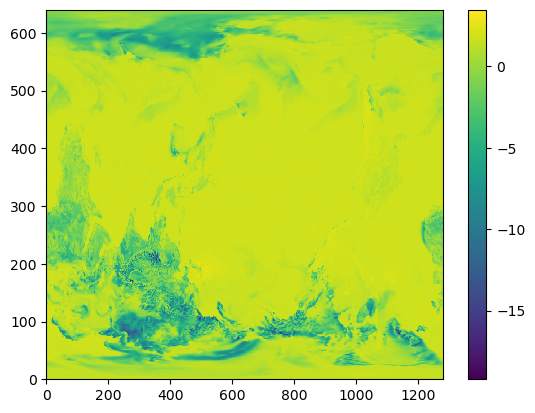

In [12]:
import matplotlib.pyplot as plt
plt.pcolor(DD[2,14,:,:]-DD[2,13,:,:])
plt.colorbar()
plt.show()

In [29]:
FPout + file_pattern

'/glade/derecho/scratch/wchapman/STAGING/*203912*.npy'

In [28]:
import glob
import os
FPout = '/glade/derecho/scratch/wchapman/STAGING/' #where do you want the files stored?
# for yryr in np.arange(1979,2040):
#     yryrstr = str(np.char.zfill(str(yryr),4))
#     for momo in np.arange(1,13):
#         momostr = str(np.char.zfill(str(momo),2))
#         # Directory containing .npy files
#         # Pattern to match .npy files
            
            
            
#         file_pattern = '*'+yryrstr+momostr+'*.npy'

#         # Get a list of file paths
#         file_paths = sorted(glob.glob(FPout + file_pattern))[:30]
#         ff = 'ERA5_e5.'+yryrstr+momostr+'.npy'
            
#         if len(file_paths)==0:
#             continue 
            
#         dirfinout = '/glade/derecho/scratch/wchapman/STAGING/STAGING_MON/'
#         fffinout  = '/ERA5_e5.'+yryrstr+momostr+'.npy'
#         if os.path.exists(dirfinout+fffinout):
#             continue
            
        print(file_paths)
        print('hi')
            
            

['/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010100.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010101.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010102.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010103.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010104.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010105.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010106.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010107.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010108.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010109.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010110.npy', '/glade/derecho/scratch/wchapman/STAGING/ERA5_e5.oper.ml.v3.uvtq.2010010111.npy', '/glade/derecho